In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### M. Charytanowicz, J. Niewczas, P. Kulczycki, P. Kowalski, and S. Lukasik. "Seeds," UCI Machine Learning Repository, 2010. [Online]. Available: https://doi.org/10.24432/C5H30K.

In [115]:
# Define column names
cols = ["Area", "Perimeter", "Compactness", "Length", "Width", "Asymmetry", "Groove", "Class"]

# Load dataset with column names
df = pd.read_csv(
    r"C:/Users/zeelp/OneDrive/Desktop/DualAxleSteering-Thesis/Docs/thesis_notes/ML/Seeds/seeds_dataset.txt",
    header=None,
    sep="\s+",   # whitespace separated
    names=cols
)

print(df.head())

    Area  Perimeter  Compactness  Length  Width  Asymmetry  Groove  Class
0  15.26      14.84       0.8710   5.763  3.312      2.221   5.220      1
1  14.88      14.57       0.8811   5.554  3.333      1.018   4.956      1
2  14.29      14.09       0.9050   5.291  3.337      2.699   4.825      1
3  13.84      13.94       0.8955   5.324  3.379      2.259   4.805      1
4  16.14      14.99       0.9034   5.658  3.562      1.355   5.175      1


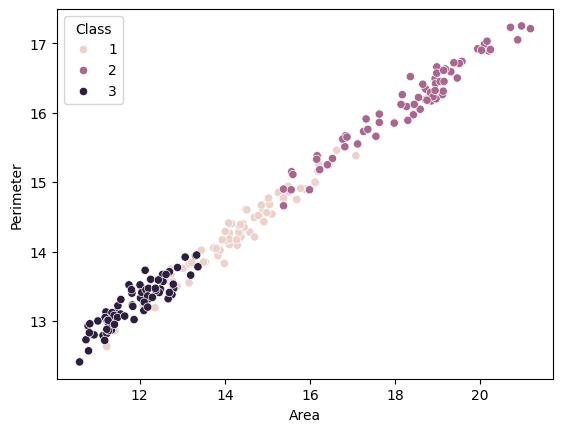

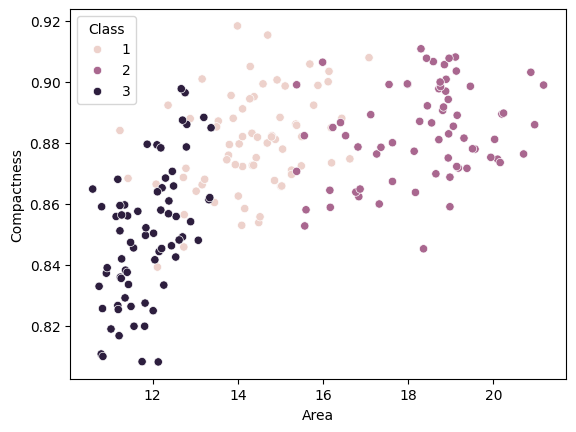

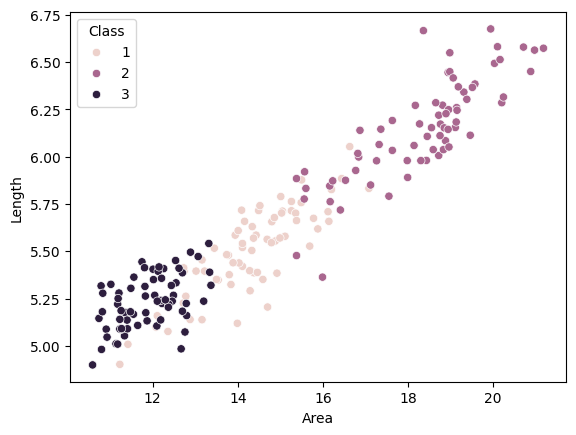

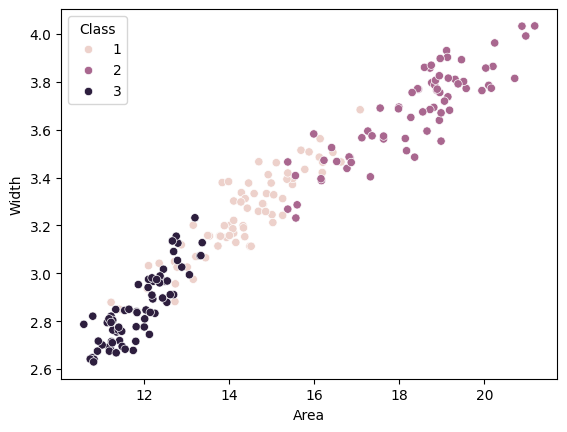

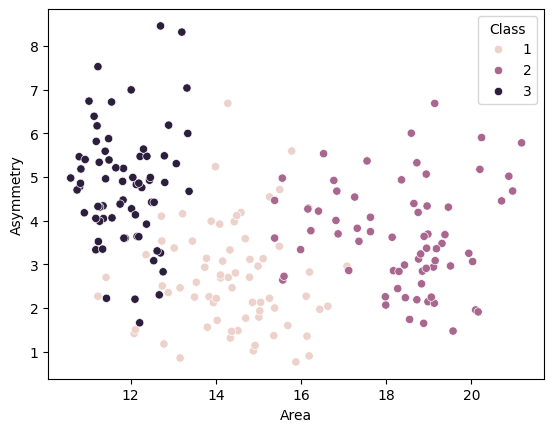

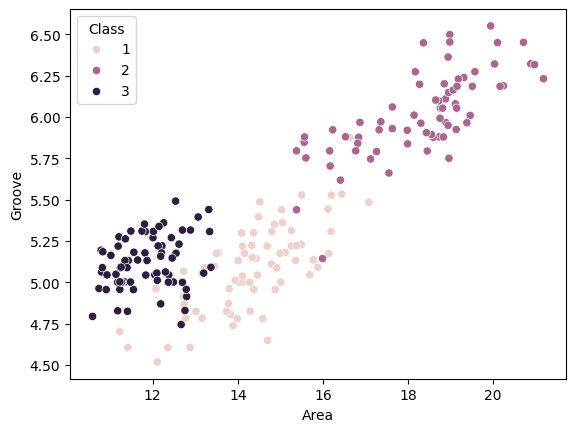

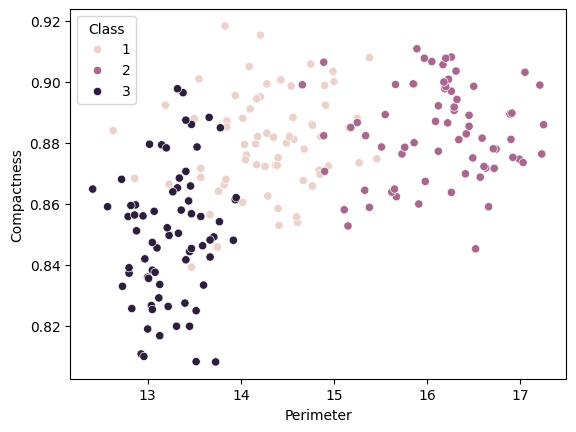

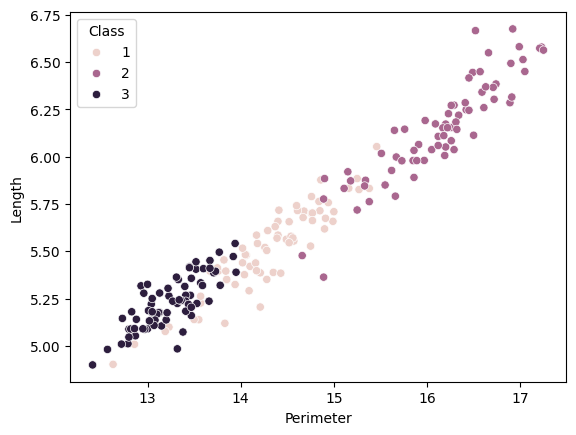

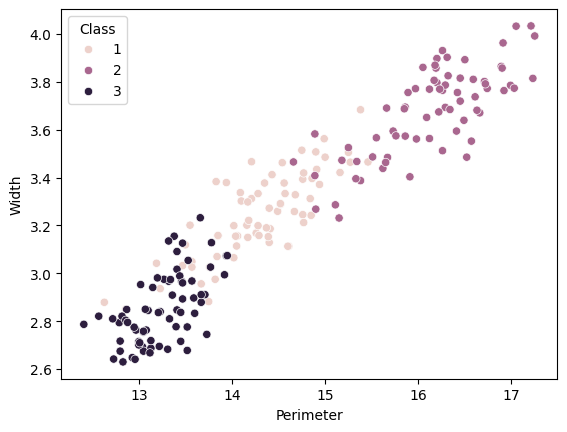

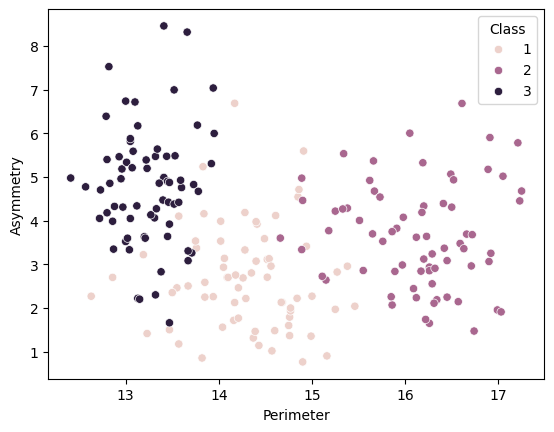

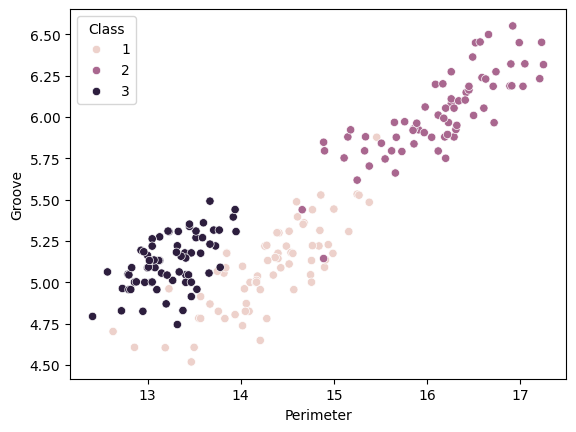

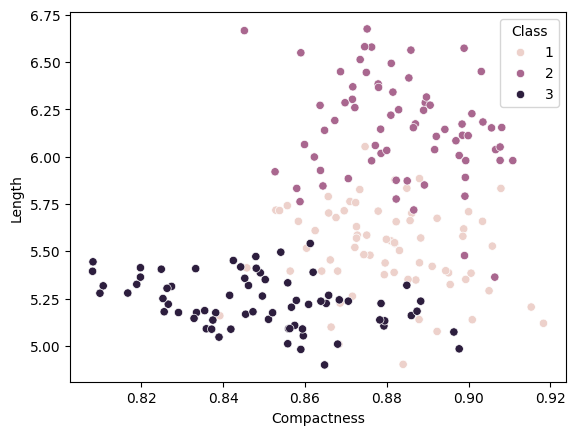

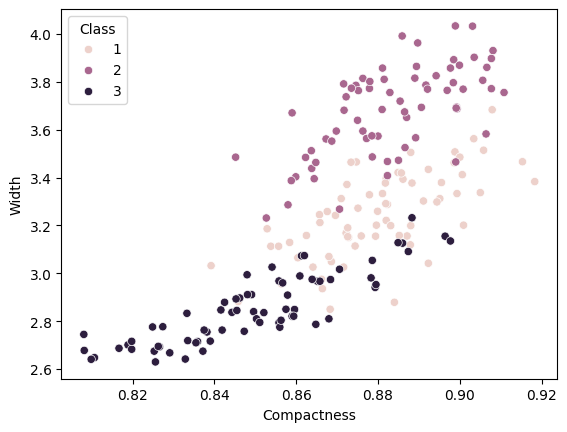

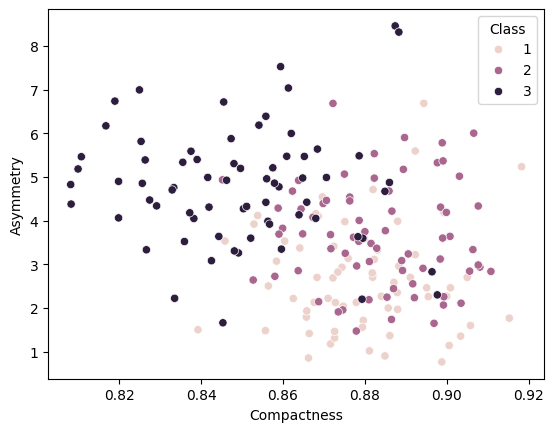

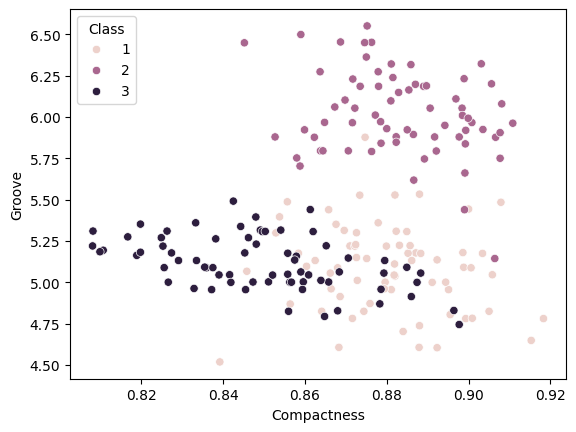

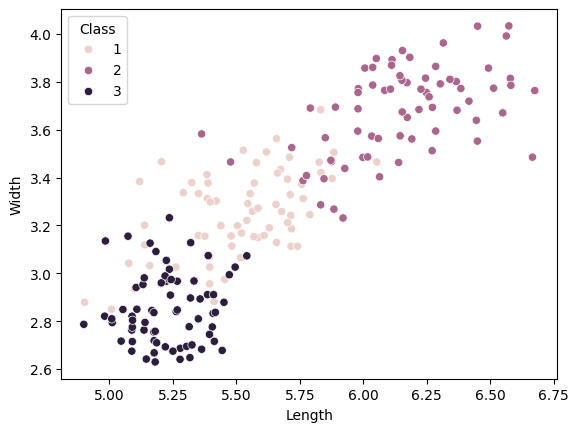

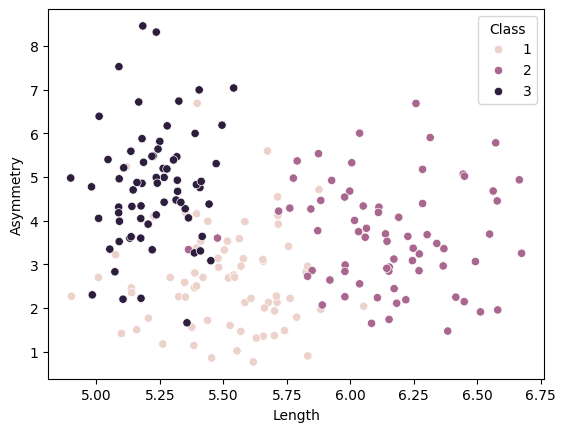

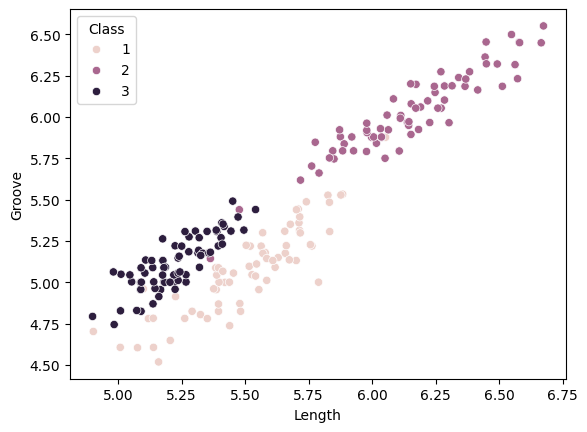

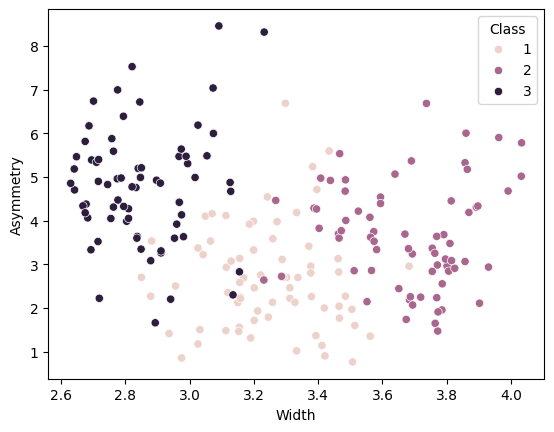

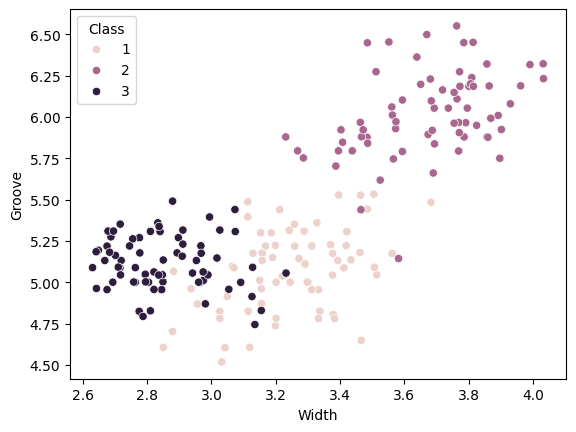

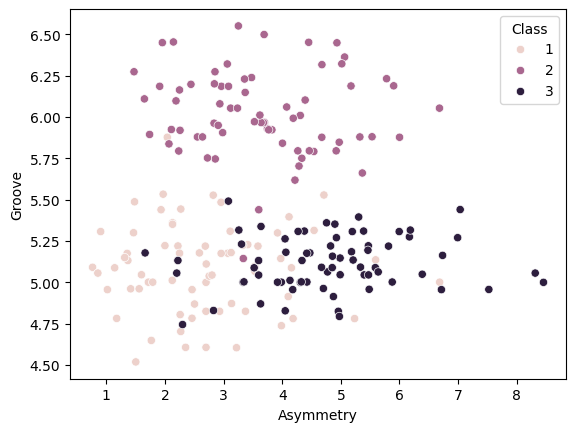

In [116]:
for i in range(len(cols) - 1):
    for j in range(i + 1, len(cols) - 1):
        x_label = cols[i]
        y_label = cols[j]
        sns.scatterplot(x=x_label, y=y_label, hue="Class", data=df)
        plt.show()


## Clustering (KMeans)

In [117]:
from sklearn.cluster import KMeans

In [118]:
x_feature = "Compactness"
y_feature = "Asymmetry"

# Select only those two features
X = df[[x_feature, y_feature]].values

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

In [119]:
clusters = Kmeans.labels_

In [120]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [121]:
df["Class"].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [122]:
# Build dataframe for plotting
cluster_df = pd.DataFrame({
    x_feature: df[x_feature],
    y_feature: df[y_feature],
    "Cluster": clusters
})

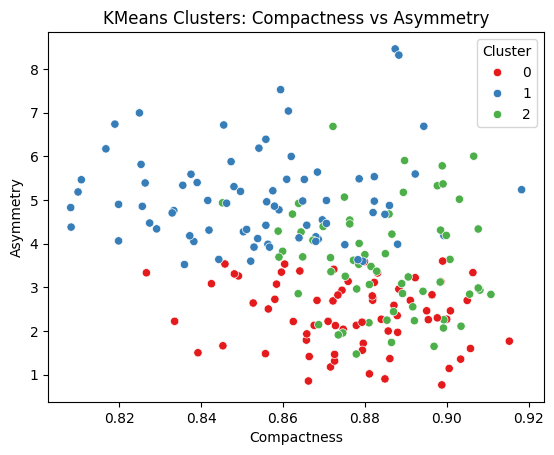

In [123]:
# Plot KMeans clusters
sns.scatterplot(
    data=cluster_df,
    x=x_feature,
    y=y_feature,
    hue="Cluster",
    palette="Set1"
)
plt.title(f"KMeans Clusters: {x_feature} vs {y_feature}")
plt.show()

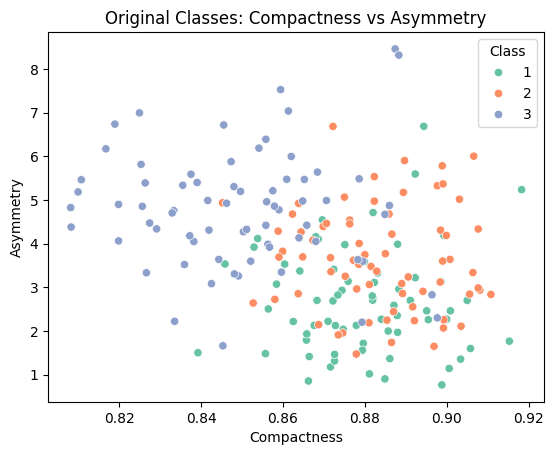

In [124]:
# Original classes from dataset
sns.scatterplot(
    data=df,
    x=x_feature,
    y=y_feature,
    hue="Class",
    palette="Set2"
)
plt.title(f"Original Classes: {x_feature} vs {y_feature}")
plt.show()

## Higher Dimensions

In [125]:
x = df[cols[:-1]].values

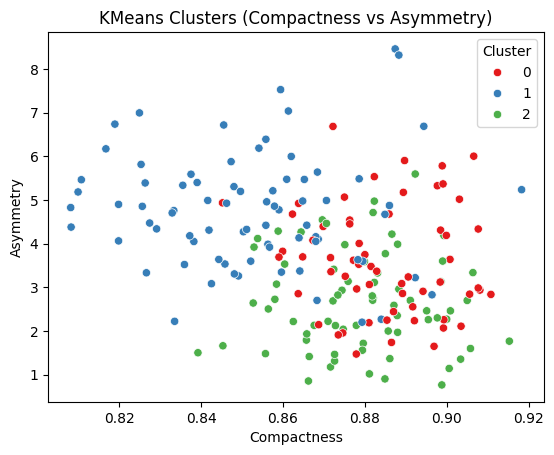

In [126]:
from sklearn.cluster import KMeans

# Pick features (all except Class)
features = df.drop("Class", axis=1).values  

# Run KMeans in higher dimension
kmeans = KMeans(n_clusters=3, random_state=42).fit(features)

# Attach clusters back to original df
cluster_df = df.copy()
cluster_df["Cluster"] = kmeans.labels_

# For visualization: pick any two features
x_feature = "Compactness"
y_feature = "Asymmetry"

# Plot clustering result
sns.scatterplot(
    data=cluster_df,
    x=x_feature,
    y=y_feature,
    hue="Cluster",
    palette="Set1"
)
plt.title(f"KMeans Clusters ({x_feature} vs {y_feature})")
plt.show()


# PCA

In [127]:
from sklearn.decomposition import PCA

In [128]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(features)

In [129]:
x.shape

(210, 7)

In [130]:
transformed_x.shape

(210, 2)

In [131]:
transformed_x[:5]  # Display first 5 transformed samples

array([[ 0.66344838, -1.41732098],
       [ 0.31566651, -2.68922915],
       [-0.6604993 , -1.13150635],
       [-1.0552759 , -1.62119002],
       [ 1.61999921, -2.18338442]])

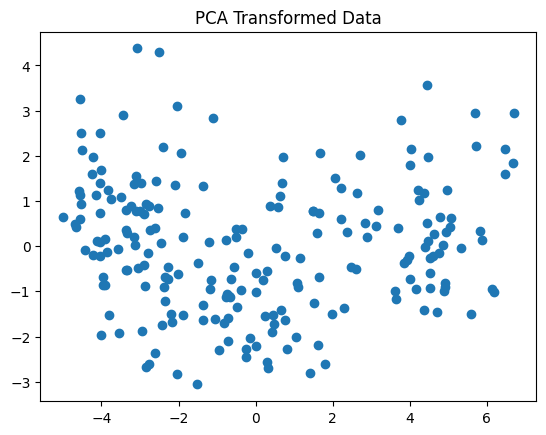

In [132]:
plt.scatter(transformed_x[:, 0], transformed_x[:, 1])
plt.title("PCA Transformed Data")
plt.show()

In [133]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, kmeans.labels_.reshape(-1, 1))), columns = ["PC1", "PC2", "Cluster"])

In [134]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df["Class"].values.reshape(-1, 1))), columns = ["PC1", "PC2", "Class"])

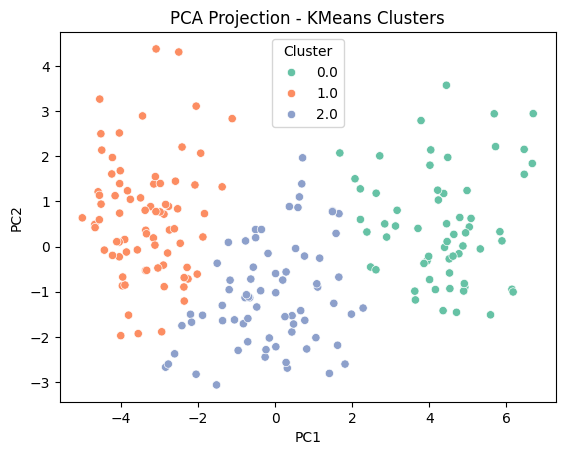

In [135]:
# KMeans clusters in PCA space

sns.scatterplot(
    data=kmeans_pca_df,
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="Set2"
)
plt.title("PCA Projection - KMeans Clusters")
plt.show()



In [139]:
kmeans_pca_df["Class"] = df["Class"].values

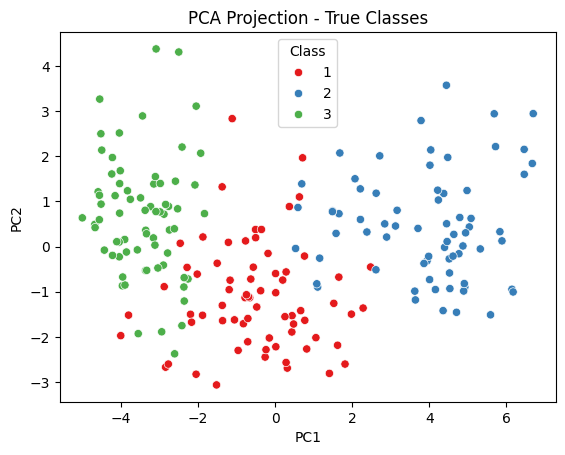

In [140]:
# True classes in PCA space

sns.scatterplot(
    data=kmeans_pca_df,
    x="PC1",
    y="PC2",
    hue="Class",
    palette="Set1"
)
plt.title("PCA Projection - True Classes")
plt.show()



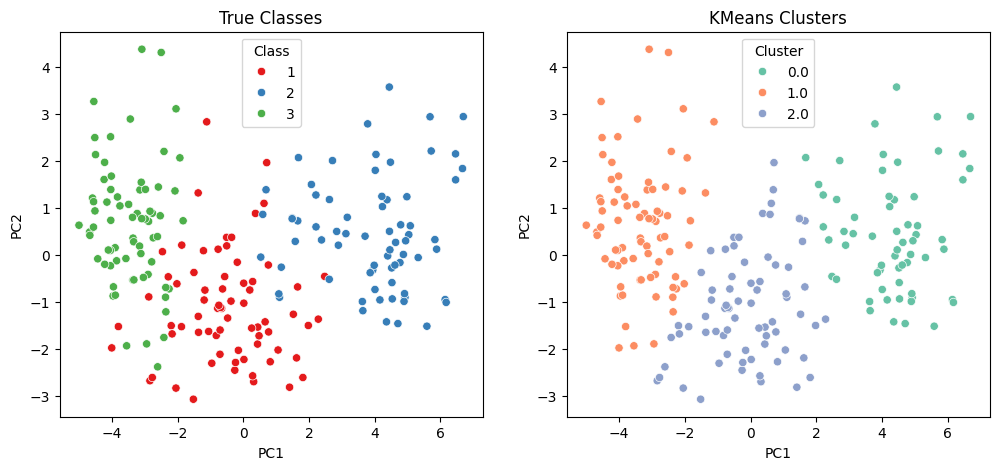

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=kmeans_pca_df, x="PC1", y="PC2", hue="Class", palette="Set1", ax=axes[0])
axes[0].set_title("True Classes")

sns.scatterplot(data=kmeans_pca_df, x="PC1", y="PC2", hue="Cluster", palette="Set2", ax=axes[1])
axes[1].set_title("KMeans Clusters")

plt.show()